# Data Generation Notebook

We use this notebook to generate all non-standard datasets used in the level 0 - 10 notebooks.

All datasets will be saved in a single .h5 file. Features will be saved under the 'X' key and targets will be saved under the 'Y' key. All features will be 2 dimensional arrays of size (num_examples, num_features). This includes the case where there is only 1 feature.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Level 1 - Free falling body 

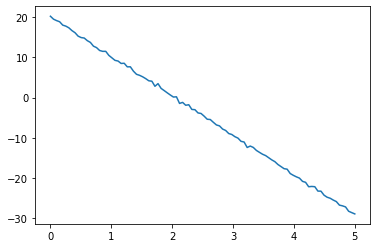

In [45]:
initial_v = 20
gravitational_constant = -9.8
noise_stddev = .25
num_train = 100

# We add error to the measurement so that the problem is not too trivial.
noise_vector = np.random.normal(loc=0.0, scale=noise_stddev, size=[num_train])

t = np.linspace(0, 5, num_train)
# Integral of Newton's law.
v_t = gravitational_constant * t + initial_v
v_t += noise_vector
X = pd.DataFrame(np.expand_dims(t, 1), columns=['t'])
Y = pd.DataFrame(v_t, columns=['v'])
assert X.shape == (num_train, 1)
plt.plot(X.values, Y.values)
plt.show()

### Level 1 - Projectile Motion

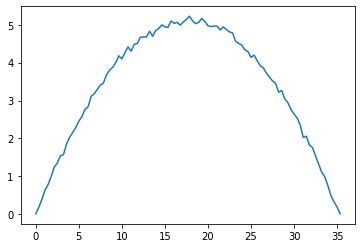

In [44]:
initial_v = 20
launch_angle = np.pi / 6
gravitational_constant = -9.8
noise_stddev = .05

noise_vector = np.random.normal(loc=0.0, scale=noise_stddev, size=[num_train])
# Equation for maximum range of a parabolic trajectory.
x_max = initial_v ** 2 * np.sin(2 * launch_angle) / (-gravitational_constant)

num_train = 100

x = np.linspace(0, x_max, num_train)
# Equation for height of parabolic trajectory as a function of x
y = np.tan(launch_angle) * x + \
    gravitational_constant * np.square(x) / (2 * initial_v**2 * np.cos(launch_angle)**2)
y += noise_vector
plt.plot(x, y)
plt.show()

### Level 1 - Orbiting body classification

Given the radius and velocity of a body, we can calculate its energy. For $E \geq 0$, the body is ejected (hyperbolic, parabolic orbit). For $E < 0$, the body is unable to escape (circular, elliptical orbit). 

We measure $r$ in astronomical units and time in years, so that $GM_{\odot} = \frac{4\pi^2 (AU^3)}{(Yr^2)}$ and take the mass of all bodies to be 1.

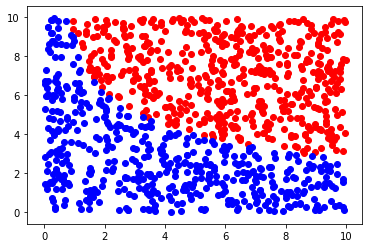

In [60]:
num_train = 1000
r = np.random.uniform(.01, 10, size=num_train)
v = np.random.uniform(0,10, size=num_train)

GM = 4 * np.pi ** 2

# E = Kinetic + Potential Energy
E = .5 * np.square(v) - GM / r

plt.scatter(r[np.where(E>=0)[0]], v[np.where(E>=0)[0]], c='r')
plt.scatter(r[np.where(E<0)[0]], v[np.where(E<0)[0]], c='b')
plt.show()